Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and student id below:

In [ ]:
NAME = "Tunlaton Wongchai"
STUDENT_ID = "63070224"

---

# 1 Multi-layer Perceptron - XOR Gate

In [23]:
import numpy as np
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

### 1.1 Define input [[0, 0], [0, 1], [1, 0], [1, 1]] as X and [0, 1, 1, 0] as y.

In [2]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

### 1.2 Design and create a Multi-layer Perceptron classifier for this dataset.

In [48]:
mlp = MLPClassifier(hidden_layer_sizes=(3, 3), max_iter=5000, random_state=42)

mlp.fit(X, y)

MLPClassifier(hidden_layer_sizes=(3, 3), max_iter=5000, random_state=42)

### 1.3 Draw your MLP classifier architecture.

**Name the file '[student_id]-architecture-1.jpg' and upload to your onlearn submission**

![architecture](63070224-architecture-1.png "architecture1")

### 1.4 Plot a decision boundary of your classifier.

Text(0.5, 1.0, 'MLP')

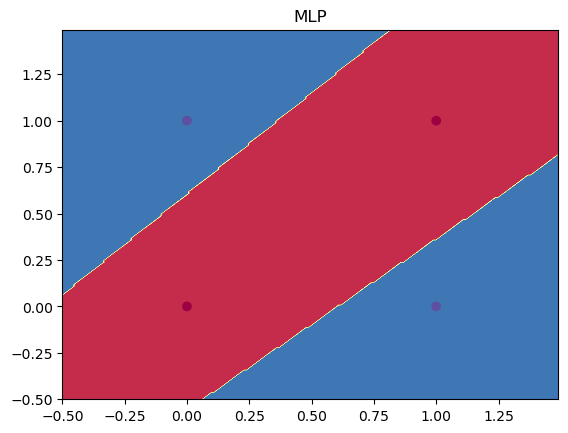

In [49]:
def plot_decision_boundary():
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid

    Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

plot_decision_boundary()
plt.title('MLP')

### 1.5 Compare and discuss on the results with the perceptron model created in the previous assignment.

`จาก assignment ก่อนหน้าพบว่า XOR gate จะไม่สามารถทำให้ model train จน converge ได้ แต่เมื่อใช้ MLP โมเดลมีความซับซ้อนมากขึ้น มีส่วนที่เป็น hidden layer และ fully connected จึงสามารถ solve XOR gate ได้`

# 2 Multi-layer Perceptron - Digit Image Dataset

In [30]:
import numpy as np
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

### 2.1 Load Digits dataset from sklearn library from the code below

Then, display a sample of each digit (0–9).

In [90]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

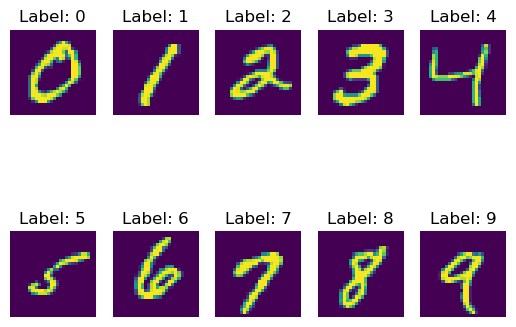

In [95]:
digit_indices = [0] * 10
for i in range(len(y)):
    label = int(y[i])
    if digit_indices[label] == 0:
        digit_indices[label] = i

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X.loc[[digit_indices[i]], :].values.reshape(28,28))
    plt.title('Label: {}'.format(i))
    plt.axis('off')
plt.show()

### 2.2 Use sklearn train test split function to randomly split the dataset to training and test sets with test size = 0.3 and shuffle = False.

In [99]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, shuffle=False)

### 2.3 Design a Multi-layer Perceptron classifier on your own. Your task is to generate a model that converges within 1000 iterations with random state = 99, alpha=1e-4, activation = ‘logistic’. Observe the results and report the accuracy of the model.

In [104]:
mlp = MLPClassifier(
    hidden_layer_sizes=(5, 5),
    max_iter=1000,
    random_state=99,
    alpha=1e-4,
    activation="logistic",
)

mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(5, 5), max_iter=1000,
              random_state=99)

In [105]:
def Accuracy(predict, target):
    correct = np.sum(predict == target)
    acc = correct * 100 / predict.shape[0]

    return acc


y_pred = mlp.predict(X_test)

Accuracy(y_pred, y_test)

85.96190476190476

### 2.4 Try to optimise the model with different solvers available in the sklearn library, such as gradient descent, quasi-newton method. Report and discuss on the results you obtain from the experiment.

In [107]:
mlp_sgd = MLPClassifier(
    hidden_layer_sizes=(5, 5),
    max_iter=1000,
    random_state=99,
    alpha=1e-4,
    activation="logistic",
    solver="sgd"
)

mlp_newton = MLPClassifier(
    hidden_layer_sizes=(5, 5),
    max_iter=1000,
    random_state=99,
    alpha=1e-4,
    activation="logistic",
    solver="lbfgs"
)

mlp_sgd.fit(X_train, y_train)
mlp_newton.fit(X_train, y_train)

c:\Users\tunza\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', hidden_layer_sizes=(5, 5), max_iter=1000,
              random_state=99, solver='lbfgs')

In [108]:
print(f"Stochastic Gradient descent: {Accuracy(mlp_sgd.predict(X_test), y_test)}")
print(f"Quasi-netwon: {Accuracy(mlp_newton.predict(X_test), y_test)}")

Stochastic Gradient descent: 76.4047619047619
Quasi-netwon: 60.27619047619048


`พบว่า solver แบบ default (Adam) ให้ผลลัพธ์ดีที่สุด เนื่องจาก Adam optimizer เป็นการนำข้อดีของทั้ง Stochastic Gradient descent และ Quasi-netwon มารวมเข้าด้วยกัน`

### 2.5 Draw your MLP classifier architecture.

**Name the file '[student_id]-architecture-2.jpg' and upload to your onlearn submission**

![architecture](63070224-architecture-2.png "architecture2")